In [23]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
import csv
def nested_dict(n, type):
    if n==1:
        defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
import pandas as pd
import seaborn as sns

colors = sns.color_palette("colorblind").as_hex()


In [24]:
data = nested_dict(4, list)
z_all= [100.0, 50.0, 10.0, 6.0, 2.0, 1.0, 0.5, 0.0]

# data['bg']['cg_0d1'] =  np.loadtxt("./CG_ks0d1//file__background.dat")
# data['bg']['cg_0d5'] =  np.loadtxt("./CG_ks0d5///file__background.dat")
# data['bg']['cg_0d5'] =  np.loadtxt("./Runs_zedaron/L_1000_N_grid_256//CG_ks0.5//output///file__background.dat")
data['bg']['qcdm'] =  np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/QCDM////file__background.dat")
# data['bg']['qcdm_large'] =  np.loadtxt("./Runs_zedaron/L_1000_N_grid_512/QCDM/output/file__background.dat")
data['bg']['lcdm'] =  np.loadtxt("./Runs_zedaron/L_1000_N_grid_256//LCDM//file__background.dat")

data['gui']['bg'] = np.loadtxt("./Gui/new_bg_cugal.txt")

for z in z_all:
    index = z_all.index(z);
#     data['phi']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_phi.dat")
    data['delta']['cg_0d01']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/CG_ks0.01/output//pk00"+str(index)+"_delta.dat")
    data['delta']['cg_0d1']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/CG_ks0.1/output//pk00"+str(index)+"_delta.dat")
    data['delta']['cg_0d5']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/CG_ks0.5/output//pk00"+str(index)+"_delta.dat")
    data['delta']['cg_1']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/CG_ks1/output/pk00"+str(index)+"_delta.dat")
#     data['delta']['cg_2']['z='+str(z)] = np.loadtxt("./CG_ks2//pk00"+str(index)+"_delta.dat")
    data['delta']['qcdm']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256/QCDM/output/pk00"+str(index)+"_delta.dat")
    data['delta']['lcdm']['z='+str(z)] = np.loadtxt("./Runs_zedaron/L_1000_N_grid_256//LCDM/output/pk00"+str(index)+"_delta.dat")

z_ecosmog =[49, 2.0, 1.0, 0.5, 0.25, 0.0]
for i in range(1,7):
    z = z_ecosmog[i-1]
    data['ecosmog']['lcdm']['z='+str(z)] = np.loadtxt("./ECOSMOG/PK_cGal_lcdm_s0"+str(i)+".dat").T
    data['ecosmog']['qcdm']['z='+str(z)] = np.loadtxt("./ECOSMOG/PK_cGal_qcdm_s0"+str(i)+".dat").T
    data['ecosmog']['full']['z='+str(z)] = np.loadtxt("./ECOSMOG/PK_cGal_full_s0"+str(i)+".dat").T
    data['ecosmog']['lin']['z='+str(z)] = np.loadtxt("./ECOSMOG/PK_cGal_linr_s0"+str(i)+".dat").T
    
    
### Gui sims:


# Specify the path to your CSV file
df_cg = pd.read_csv('./Gui/Gui_new_CuGal.csv', header=[0,1])
df_lcdm = pd.read_csv('./Gui/HiCOLA_Pk.csv', header=[0,1])
# df_lcdm['Unnamed: 0']
#     df_lcdm.keys()

## Plots:

### Background

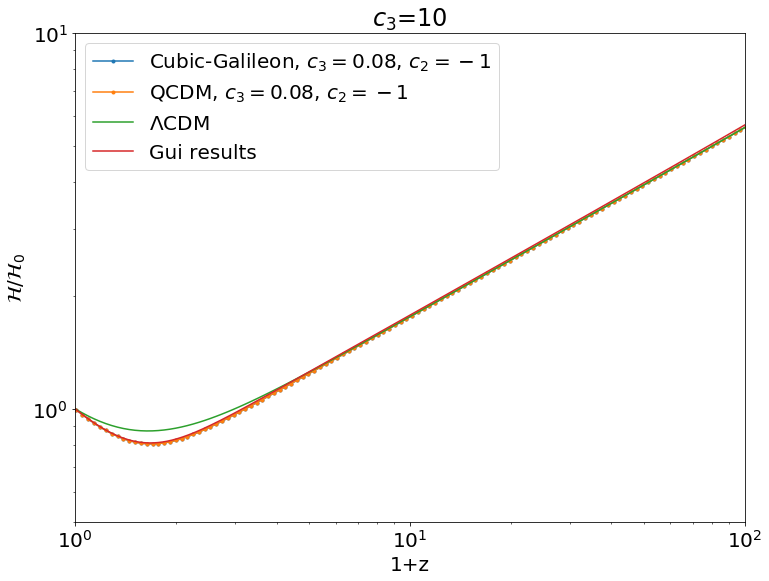

In [26]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(1./data['bg']['cg_0d5'][:,2], data['bg']['cg_0d5'][:,3], ".-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
plt.loglog(1./data['bg']['qcdm'][:,2], data['bg']['qcdm'][:,3], ".-",  label = "QCDM, $c_3=0.08$, $c_2 = -1$")
plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")

a = data['gui']['bg'][:,0]
HoveH0=data['gui']['bg'][:,1]
plt.loglog(1./a, HoveH0*a,"-", label="Gui results")

plt.title(r"$c_3 $=10")
plt.xlabel("1+z")
plt.ylabel("$\mathcal{H}/\mathcal{H}_0$")
# plt.ylim(0.001, 0.5)
plt.xlim(1, 100)
plt.ylim(0.5, 10)

# plt.yscale('log')
plt.legend()

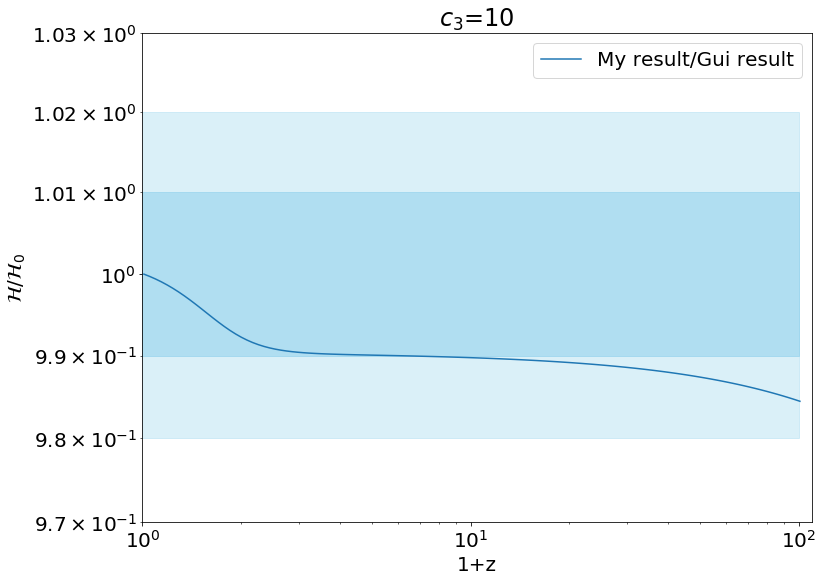

In [27]:
from scipy.interpolate import interp1d

plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

# plt.loglog(1./data['bg']['cg_1'][:,2], data['bg']['cg_1'][:,3], ".-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
# plt.loglog(1./data['bg']['qcdm'][:,2], data['bg']['qcdm'][:,3], ".-",  label = "QCDM, $c_3=0.08$, $c_2 = -1$")
# plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")
x = np.linspace(0, 100, 100)
y_line = np.ones_like(x)
upper_bound = y_line + 0.01
lower_bound = y_line - 0.01
upper_bound2 = y_line + 0.02
lower_bound2 = y_line - 0.02

a_gev = data['bg']['qcdm'][:,2][:-1]
a = data['gui']['bg'][:,0]
HoveH0=data['gui']['bg'][:,1]
H_interp = interp1d(a , HoveH0*a)

plt.loglog(1./a_gev, data['bg']['cg_0d5'][:,3][:-1]/H_interp(a_gev),"-", label="My result/Gui result")
plt.fill_between(x, lower_bound, upper_bound, color='skyblue', alpha=0.5)
plt.fill_between(x, lower_bound2, upper_bound2, color='skyblue', alpha=0.3)

plt.title(r"$c_3 $=10")
plt.xlabel("1+z")
plt.ylabel("$\mathcal{H}/\mathcal{H}_0$")
# plt.ylim(0.001, 0.5)
plt.xlim(1, 110)
plt.ylim(0.97, 1.03)

# plt.yscale('log')
plt.legend()

# $\Delta G/G$

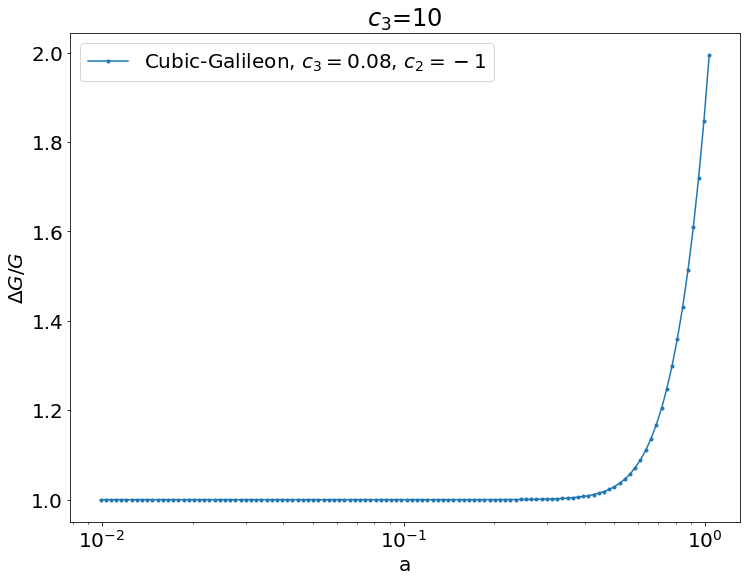

In [28]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.semilogx(data['bg']['cg_0d5'][:,2], 1+data['bg']['cg_0d5'][:,4], ".-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
# plt.semilogx(1./data['bg']['qcdm'][:,2], (data['bg']['qcdm'][:,4]), ".-",  label = "QCDM, $c_3=0.08$, $c_2 = -1$")
# plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("a")
plt.ylabel("$\Delta G/G$")
# plt.ylim(0.001, 0.5)
# plt.xlim(0.005, 0.8)
# plt.yscale('log')
plt.legend()

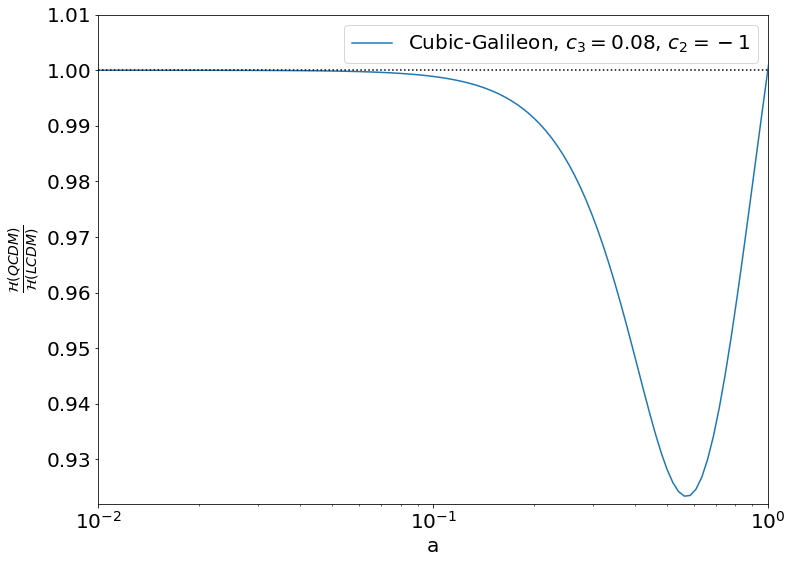

In [29]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

# plt.semilogx(data['bg']['qcdm'][:,2], (data['bg']['qcdm'][:,3]*data['bg']['qcdm'][-1:,3])/(data['bg']['lcdm'][:,3]*data['bg']['lcdm'][-1:,3]), "-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
plt.semilogx(data['bg']['qcdm'][:,2], (data['bg']['qcdm'][:,3])/(data['bg']['lcdm'][:,3]), "-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")

# plt.loglog(1./data['bg']['lcdm'][:,2], , "-", label = "$\Lambda$CDM")
plt.axhline(y=1, linestyle=":",color="black")

# plt.title(r"$c_3 $=0.08")
plt.xlabel("a")
plt.ylabel(r"$\frac{\mathcal{H}(QCDM)}{\mathcal{H}({LCDM})}$")
plt.ylim(0.922, 1.01)
plt.xlim(0.01, 1.)
# plt.yscale('log')
plt.legend()

0.0
0.5
1.0
2.0


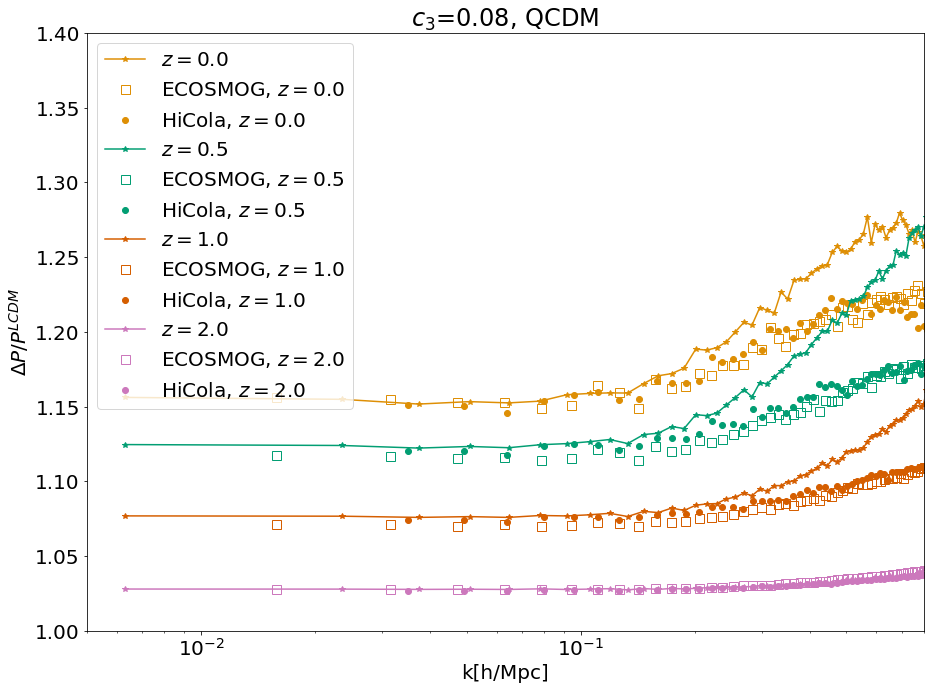

In [30]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(15,11))

l=0
numb = 10
for z in [0.0, 0.5, 1.0, 2.0]:
    l=l+1
    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['qcdm']['z='+str(z)][:,0]
    pk_ec = data['delta']['qcdm']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref[::numb], (pk_ec[::numb]/p_ec_ref[::numb]), "*-", color=colors[l], label = "$z=$"+str(z))

    ##########
    print(str(z))
    BoxSize = 400.;
    kf = 2*np.pi/BoxSize
    k_ec_ref =  (data['ecosmog']['lcdm']['z='+str(z)][0]*kf)[1:]
    p_ec_ref =  (data['ecosmog']['lcdm']['z='+str(z)][2]*(BoxSize)**3)[1:]
    k_ec = (data['ecosmog']['qcdm']['z='+str(z)][0]*kf)[1:]
    pk_ec = (data['ecosmog']['qcdm']['z='+str(z)][2]*(BoxSize)**3)[1:]
    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "s", markersize = 9, color=colors[l], label = "ECOSMOG, $z=$"+str(z),markerfacecolor='none')
    ##########
#     if (z==0):
#         k_ec_ref =  df_lcdm['Unnamed: 0_level_0']['Unnamed: 0_level_1'][1:]
#         p_ec_ref =  df_lcdm['LCDM']['0.0'][1:]
#         pk_ec = df_lcdm['QCDM']['0.0'][1:]
#         plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "HiCola, $z=$"+str(z))
#     else:
    k_ec_ref =  df_lcdm['Unnamed: 0_level_0']['Unnamed: 0_level_1'][1:]
    p_ec_ref =  df_lcdm['LCDM'][str(z)][1:]
    pk_ec = df_lcdm['QCDM'][str(z)][1:]
    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "HiCola, $z=$"+str(z))
    
    plt.title(r"$c_3 $=0.08, QCDM")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(1.0, 1.4)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


0.0
0.5


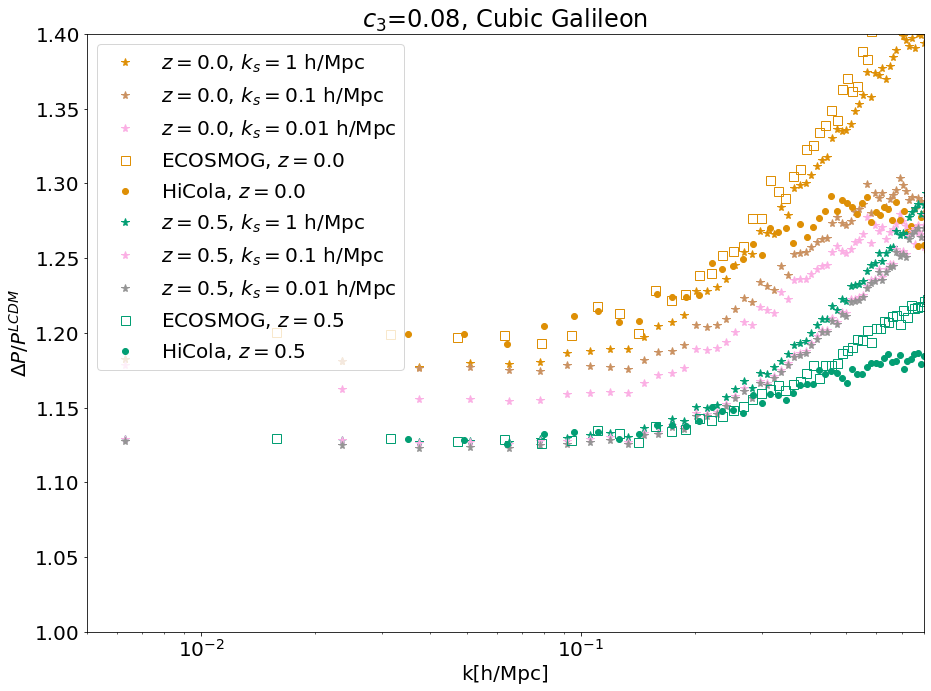

In [34]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(15,11))

l=0
numb = 10
for z in [0.0, 0.5]:
    l=l+1
    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]
    plt.semilogx(k_ec_ref[::numb], (pk_ec[::numb]/p_ec_ref[::numb]), "*", markersize=8, color=colors[l], label = "$z=$"+str(z)+", $k_s = 1$ h/Mpc")

    
    k_ec = data['delta']['cg_0d1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d1']['z='+str(z)][:,1]
    plt.semilogx(k_ec_ref[::numb], (pk_ec[::numb]/p_ec_ref[::numb]), "*", markersize=8,color=colors[l+4], label = "$z=$"+str(z)+", $k_s = 0.1$ h/Mpc")

    
    k_ec = data['delta']['cg_0d01']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d01']['z='+str(z)][:,1]
    plt.semilogx(k_ec_ref[::numb], (pk_ec[::numb]/p_ec_ref[::numb]), "*", markersize=8, color=colors[l+5], label = "$z=$"+str(z)+", $k_s = 0.01$ h/Mpc")

    
    ##########
    ##########
    print(str(z))
    BoxSize = 400.;
    kf = 2*np.pi/BoxSize
    k_ec_ref =  (data['ecosmog']['lcdm']['z='+str(z)][0]*kf)[1:]
    p_ec_ref =  (data['ecosmog']['lcdm']['z='+str(z)][2]*(BoxSize)**3)[1:]
    k_ec = (data['ecosmog']['lin']['z='+str(z)][0]*kf)[1:]
    pk_ec = (data['ecosmog']['lin']['z='+str(z)][2]*(BoxSize)**3)[1:]
    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "s", markersize = 9, color=colors[l], label = "ECOSMOG, $z=$"+str(z),markerfacecolor='none')

#     k_ec_ref =  data['ecosmog']['lcdm']['z='+str(z)][::,5]
#     p_ec_ref =  data['ecosmog']['lcdm']['z='+str(z)][::,2]
#     k_ec = data['ecosmog']['cg_1']['z='+str(z)][::,5]
#     pk_ec = data['ecosmog']['cg_1']['z='+str(z)][::,2]
#     plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "ECOSMOG, $z=$"+str(z))
    ##########
#     if (z==0):
#         k_ec_ref =  k_ec_ref =  df_lcdm['Unnamed: 0_level_0']['Unnamed: 0_level_1'][1:]
#         p_ec_ref =  df_lcdm['LCDM'][1:]
#         pk_ec = df_lcdm['CuGal'][1:]
#         plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "HiCola, $z=$"+str(z))
#     else:
    k_ec_ref =  df_lcdm['Unnamed: 0_level_0']['Unnamed: 0_level_1'][1:]
    p_ec_ref =  df_lcdm['LCDM'][str(z)][1:]
    pk_ec = df_lcdm['CuGal'][str(z)][1:]
            

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "HiCola, $z=$"+str(z))

#     if (z==0):
#         k_ec_ref =  df_lcdm['Unnamed: 0'][1:]
#         p_ec_ref =  df_lcdm['LCDM'][1:]
#         pk_ec = df_cg['z0'][1:]
#         plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "Full-HiCola, $z=$"+str(z))
#     else:
#         k_ec_ref =  df_lcdm['Unnamed: 0'][1:]
#         p_ec_ref =  df_lcdm['LCDM.'+str(l)][1:]
#         pk_ec = df_lcdm['CuGal.'+str(l)][1:]
#         plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), "o", color=colors[l], label = "Full-HiCola, $z=$"+str(z))
    
    
    plt.title(r"$c_3 $=0.08, Cubic Galileon")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(1.0, 1.4)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


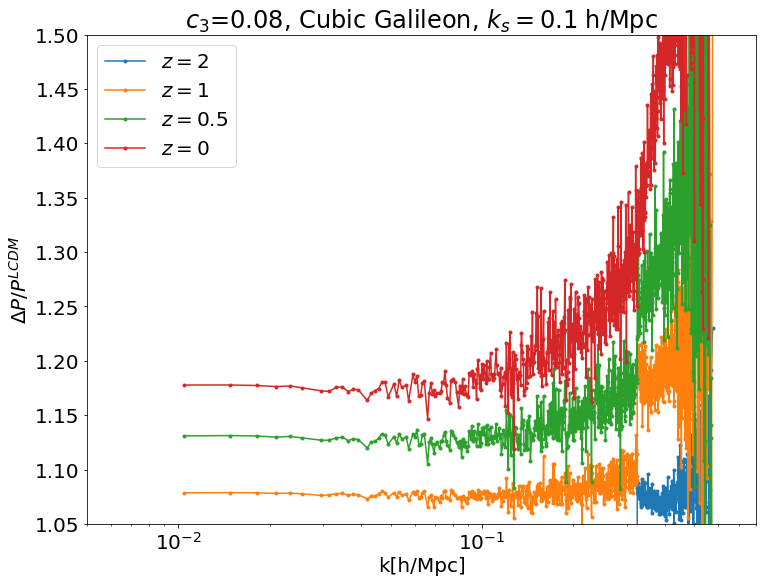

In [60]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [2, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]



#     k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
#     p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

#     k_ec = data['ecosmog']['lcdm'][:,0]
#     pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]
    
    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref), ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(1.05, 1.5)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


# Cubic Galileon wrt QCDM

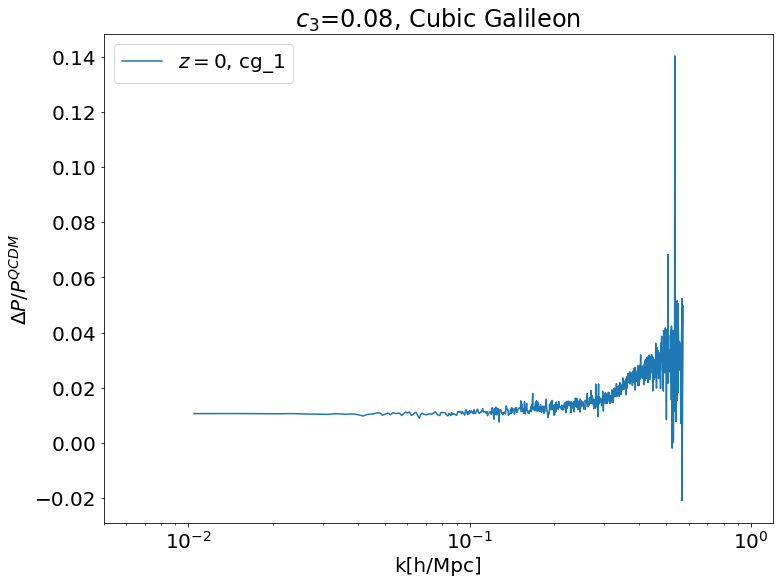

In [43]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))
colors= ["red","blue","green","magenta"]
l=0
# for model in ['cg_0d01','cg_0d1', 'cg_0d5','cg_1','cg_2']:
for model in ['cg_1']:

    for z in [0]:

        k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
        p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

        k_ec = data['delta'][model]['z='+str(z)][:,0]
        pk_ec = data['delta'][model]['z='+str(z)][:,1]

        plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., "-", label = "$z=$"+str(z)+", "+model)


        plt.title(r"$c_3 $=0.08, Cubic Galileon")
        plt.xlabel("k[h/Mpc]")
        plt.ylabel("$\Delta P/P^{QCDM}}$")
#         plt.ylim(-0.06, 0.01)
        plt.xlim(0.005, 1.2)
    #     plt.yscale('log')
        plt.legend()
        l=l+1
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


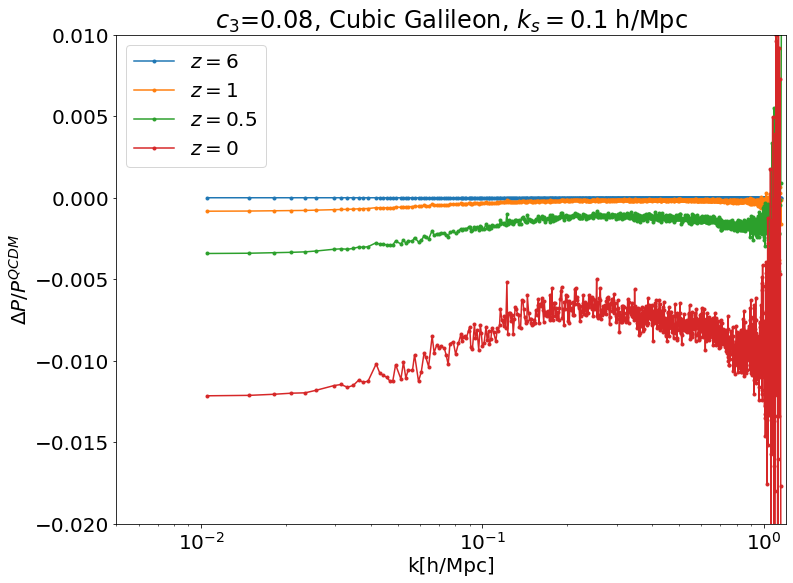

In [53]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_0d1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.02, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


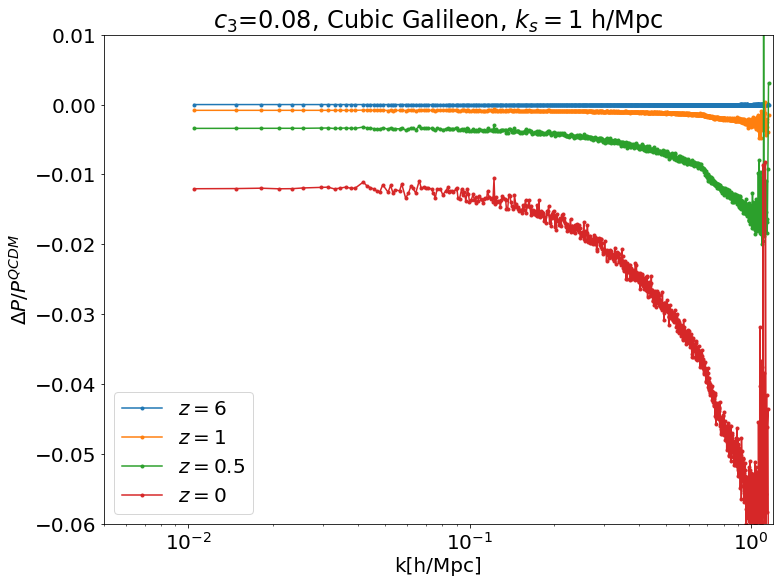

In [45]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.06, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


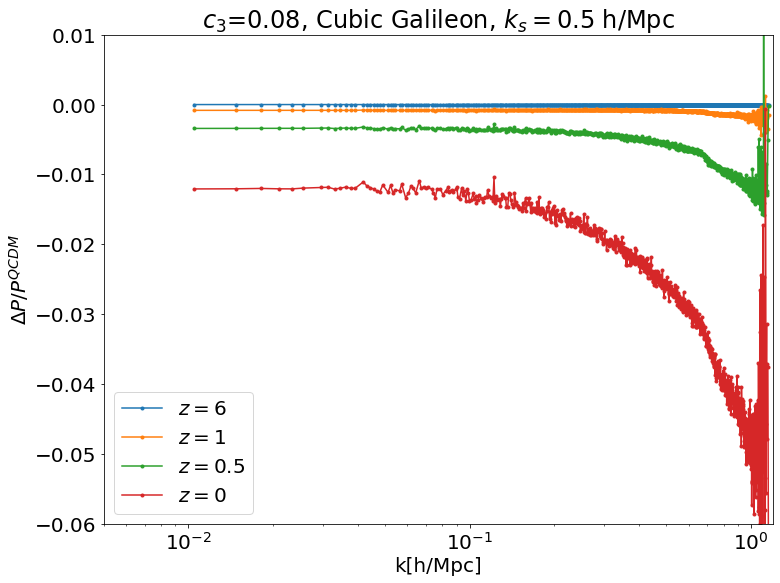

In [46]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_0d5']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d5']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.5$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.06, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


# The effect of $k_s$ parameter 

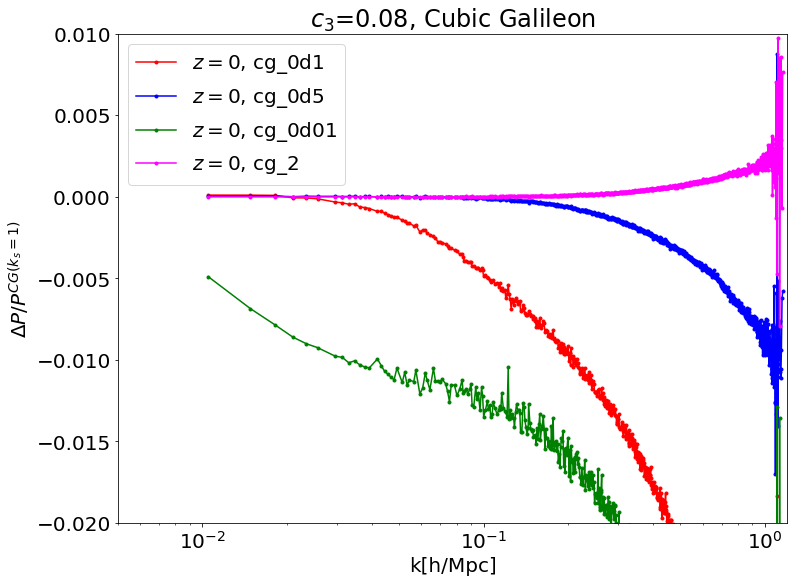

In [61]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

l=0
colors= ["red","blue","green","magenta"]
for model in ['cg_0d1', 'cg_0d5','cg_0d01','cg_2']:
    for z in [0]:

        k_ec_ref =  data['delta'][model]['z='+str(z)][:,0]
        p_ec_ref =  data['delta'][model]['z='+str(z)][:,1]

        k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
        pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]

        plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", color= colors[l] ,label ="$z=$"+str(z)+", "+model)


        plt.title(r"$c_3 $=0.08, Cubic Galileon")
        plt.xlabel("k[h/Mpc]")
        plt.ylabel("$\Delta P/P^{CG(k_s=1)}}$")
        plt.ylim(-0.02, 0.01)
        plt.xlim(0.005, 1.2)
    #     plt.yscale('log')
        plt.legend()
        l=l+1
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


In [ ]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.semilogx(data['bg']['cg_1'][:,2], 1+data['bg']['cg_1'][:,4], ".-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
# plt.semilogx(1./data['bg']['qcdm'][:,2], (data['bg']['qcdm'][:,4]), ".-",  label = "QCDM, $c_3=0.08$, $c_2 = -1$")
# plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("a")
plt.ylabel("$\Delta G/G$")
# plt.ylim(0.001, 0.5)
# plt.xlim(0.005, 0.8)
# plt.yscale('log')
plt.legend()